In [105]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [106]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## 데이터 로드

In [107]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


이 데이터셋은 당뇨병 예측을 위한 데이터로, 각 피처(특징)들은 환자의 건강 정보와 관련된 데이터를 나타냅니다. 아래는 각 피처에 대한 설명입니다.

1. **Pregnancies (임신 횟수)**: 환자가 임신한 횟수를 나타냅니다. 이 값은 당뇨병 발병 가능성에 영향을 미칠 수 있습니다.

2. **Glucose (혈당 수치)**: 2시간 동안의 경구 포도당 내성 검사에서 측정된 혈당 수치를 나타냅니다. 혈당 수치는 당뇨병을 진단하는 주요 기준 중 하나입니다.

3. **BloodPressure (혈압)**: 환자의 이완기 혈압을 나타냅니다(단위: mmHg). 고혈압은 당뇨병과 관련된 중요한 위험 요인 중 하나입니다.

4. **SkinThickness (피부 두께)**: 삼두근 피부 두께를 측정한 값으로, 체지방량을 추정하는 지표로 사용됩니다(단위: mm). 이 값이 비만과 관련이 있을 수 있습니다.

5. **Insulin (인슐린 수치)**: 혈액에서 측정된 2시간 동안의 혈청 인슐린 수치(단위: μU/ml)를 나타냅니다. 인슐린 저항성이나 인슐린 분비량의 변화는 당뇨병과 관련이 있습니다.

6. **BMI (체질량지수)**: 체중(kg)을 신장의 제곱(m²)으로 나눈 값으로, 비만도를 나타냅니다. BMI는 당뇨병 발병 위험과 밀접한 관련이 있습니다.

7. **DiabetesPedigreeFunction (당뇨 유전적 계수)**: 가족력과 유전적 요인에 따른 당뇨병 발병 가능성을 나타내는 지표입니다. 값이 높을수록 가족 중 당뇨병 환자가 많거나 유전적 영향이 클 수 있습니다.

8. **Age (나이)**: 환자의 나이를 나타냅니다. 나이가 많을수록 당뇨병 발병 위험이 높아질 수 있습니다.

9. **Outcome (결과)**: 환자가 당뇨병을 가지고 있는지 여부를 나타냅니다. 1은 당뇨병이 있음을, 0은 당뇨병이 없음을 의미합니다.

이 데이터셋은 각 환자의 건강 정보를 바탕으로 당뇨병 발병 여부를 예측하는 데 사용됩니다.

Text(0.5, 1.0, 'Label')

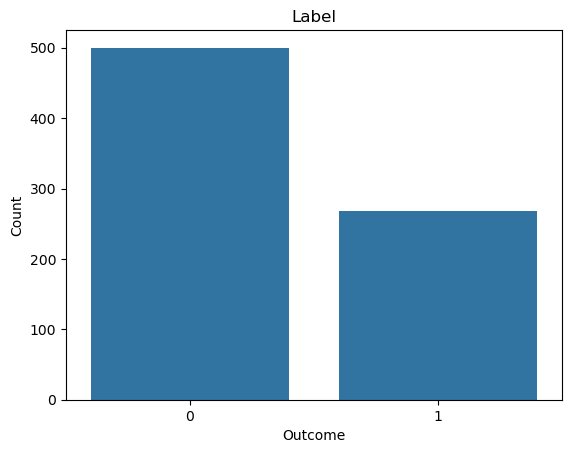

In [108]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Label")

## 전처리

In [109]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [110]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

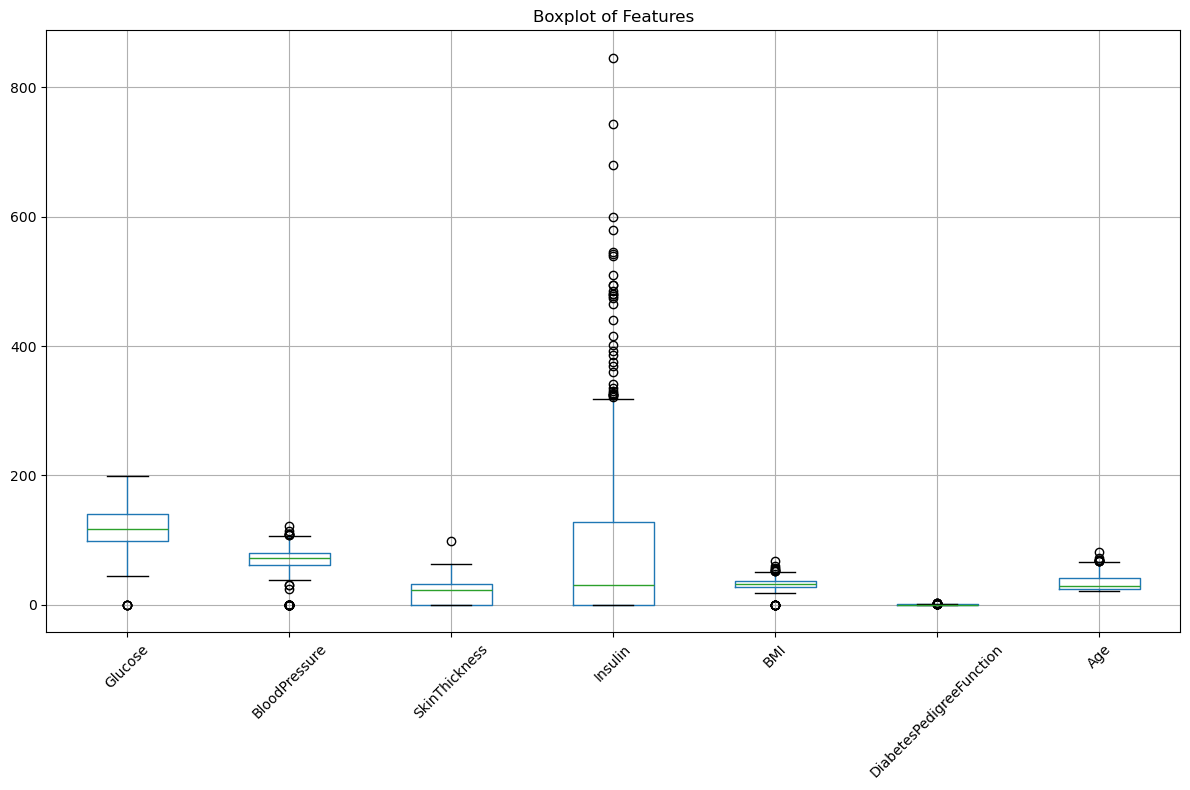

In [111]:
import matplotlib.pyplot as plt

# 박스플롯 그리기 (Outcome 피쳐는 제외)
plt.figure(figsize=(12, 8))
df.drop(columns='Outcome').boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

In [112]:
y = df["Outcome"]
y.value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [113]:
x = df.drop("Outcome" , axis = 1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


## 원-핫 인코딩

In [114]:
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [115]:
X = x.values

In [116]:
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [118]:
import numpy as np
from collections import Counter

# split_sequence 함수 
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [119]:
# n_step 값 정의
n_step = 7

# X과 y을 시퀀스 형태로 변환
X, y = split_sequence(x,y,n_step)
print(f" data shape: {X.shape}, Labels shape: {y.shape}")


 data shape: (761, 7, 7), Labels shape: (761,)


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((486, 7, 7), (153, 7, 7), (486,), (153,), (122, 7, 7), (122,))

In [121]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [122]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train_encoded)
val_one_hot = to_categorical(y_val_encoded)
testy_one_hot = to_categorical(y_test_encoded)

In [123]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
n_timesteps, n_features

(7, 7)

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN 모델 정의
model = Sequential()

# Conv2D 레이어 추가 (필터 32개, 커널 크기 3x3, 입력 형태는 시계열 데이터에 맞게 설정)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(n_timesteps, n_features, 1), padding='same'))

# MaxPooling 레이어 추가 (풀링 크기 2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 추가 Conv2D와 MaxPooling 레이어 (필터 64개로 증가)
# 여기에서 커널 크기 3x3 사용, padding='same'으로 변경
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 출력층에 연결하기 위해 Flatten 레이어 사용
model.add(Flatten())

# Dense 레이어 추가
model.add(Dense(128, activation='relu'))

# 출력층 추가 (n_outputs는 클래스 수)
model.add(Dense(2, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 구조 출력
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 128)             

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# CNN 모델 정의
model = Sequential()

# Conv1D 레이어 추가 (필터 32개, 커널 크기 3, 입력 형태는 시계열 데이터에 맞게 설정)
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features), padding='same'))

# MaxPooling1D 레이어 추가 (풀링 크기 2)
model.add(MaxPooling1D(pool_size=2))

# 추가 Conv1D와 MaxPooling 레이어 (필터 64개로 증가)
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'))  # kernel_size를 2로 줄임
model.add(MaxPooling1D(pool_size=2))

# 출력층에 연결하기 위해 Flatten 레이어 사용
model.add(Flatten())

# Dense 레이어 추가
model.add(Dense(128, activation='tanh'))

# 출력층 추가 (n_outputs는 클래스 수)
model.add(Dense(2, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 구조 출력
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 7, 32)             704       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 3, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 3, 64)             4160      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 128)             

In [126]:
batch_size = 16

train_epochs = 50
history = model.fit(X_train, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50


2024-09-30 02:15:04.242384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 0.5512 - accuracy: 0.7737

2024-09-30 02:15:04.998856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 1s 24ms/step - loss: 0.5512 - accuracy: 0.7737 - val_loss: 0.4985 - val_accuracy: 0.8115
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 0.4916 - accuracy: 0.8066 - val_loss: 0.5047 - val_accuracy: 0.8115
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 0.4911 - accuracy: 0.8066 - val_loss: 0.4881 - val_accuracy: 0.8115
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.8066 - val_loss: 0.4806 - val_accuracy: 0.8115
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: 0.4913 - accuracy: 0.8066 - val_loss: 0.4995 - val_accuracy: 0.8115
Epoch 6/50
31/31 [==============================] - 0s 6ms/step - loss: 0.4883 - accuracy: 0.8066 - val_loss: 0.4865 - val_accuracy: 0.8115
Epoch 7/50
31/31 [==============================] - 0s 6ms/step - loss: 0.4830 - accuracy: 0.8066 - val_loss: 0.4879 - val_accuracy: 0.8115
Epoch 8/50
31/31 [============

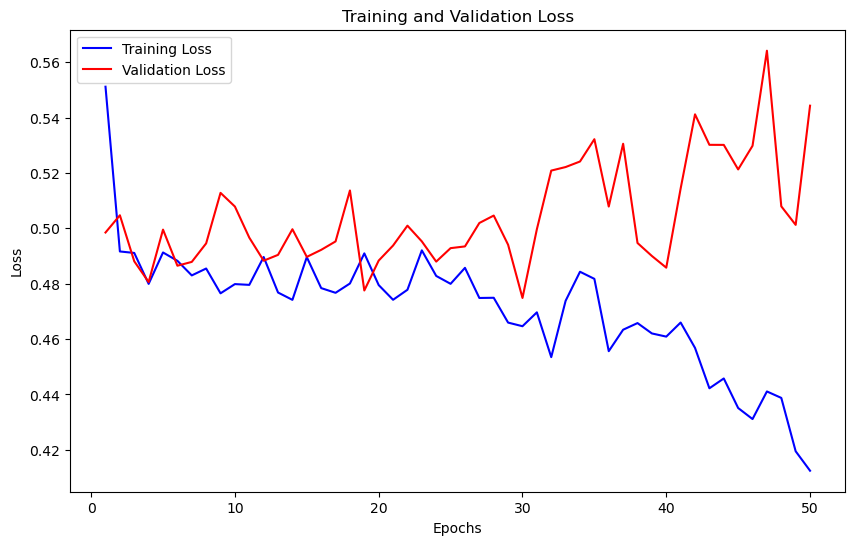

In [127]:
# 손실과 검증 손실 값 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

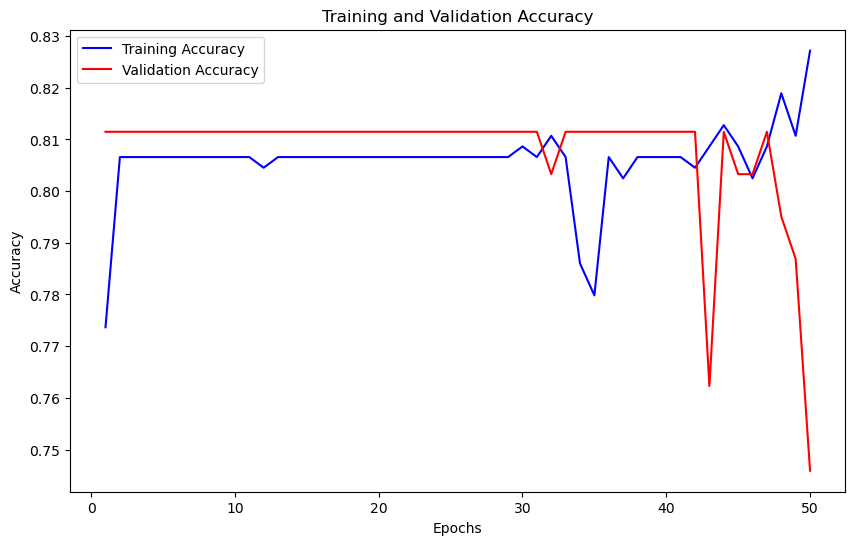

In [128]:
# 정확도와 검증 정확도 값 가져오기
acc = history.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [129]:
model.evaluate(X_test , testy_one_hot)

5/5 [==============================] - 0s 31ms/step - loss: 0.5097 - accuracy: 0.7843


[0.509672999382019, 0.7843137383460999]

5/5 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       124
           1       0.30      0.10      0.15        29

    accuracy                           0.78       153
   macro avg       0.56      0.52      0.52       153
weighted avg       0.72      0.78      0.74       153

[[117   7]
 [ 26   3]]


2024-09-30 02:15:29.073041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


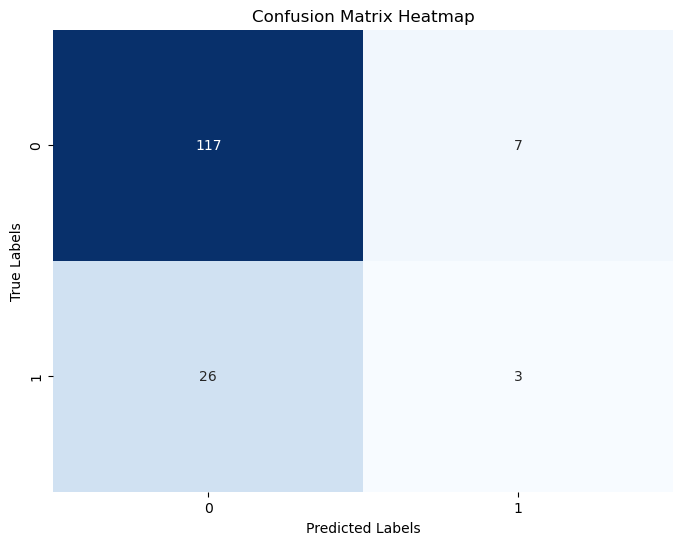

Base Loss: 0.51
Base Accuracy: 78.43%


In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 새로운 모델 평가
base_loss, base_accuracy = model.evaluate(X_test, testy_one_hot)

# 예측값 생성
y_pred_class = model.predict(X_test)
y_pred_class = y_pred_class.argmax(axis=1)  # 예측값이 원-핫 인코딩이라면 클래스 인덱스로 변환

# y_test_class가 원-핫 인코딩이라면 클래스 인덱스로 변환
y_test_class = testy_one_hot.argmax(axis=1)

# Classification report 출력
print(classification_report(y_test_class, y_pred_class))

# Confusion matrix 생성
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(conf_matrix)

# Confusion matrix heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 모델의 손실과 정확도 출력
print(f'Base Loss: {base_loss:.2f}')
print(f'Base Accuracy: {base_accuracy*100:.2f}%')

### 앞에서 만든 CNN모델에서 풀력층을 제외하고 저장하는 코드

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


# 마지막 Dense 층 제거
model.pop()

# 제거 후의 모델 구조 확인
print("After removing the last layer:")
model.summary()

# 모델 컴파일 (재컴파일 필요)
# 컴파일은 훈련을 위한 것이며, 저장에는 필수적이지 않지만 모델을 사용하려면 필요
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 저장
model_file_path = './CNN_without_last_layer.h5'
model.save(model_file_path)
print(f"Model saved at {model_file_path}")

After removing the last layer:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 7, 32)             704       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 3, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 3, 64)             4160      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_35 (Dense)     

In [132]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file_path)

In [133]:
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  6


In [134]:
base_model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 7, 32)             704       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 3, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 3, 64)             4160      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 128)             

### base_model이후에 Dense_layer를 추가하여 모델을 fine_tuning

In [135]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(128, activation='tanh'))  # 기존 출력층 앞의 레이어 대신 추가

new_model.add(layers.Dense(256, activation='tanh'))

new_model.add(layers.Dense(128, activation='tanh'))
# 최종 출력층 추가 
new_model.add(layers.Dense(2, activation='sigmoid'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 128)               13184     
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 256)               33024     
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 2)                 258       
                                                                 
Total params: 95,874
Trainable params: 82,690
Non-trainable params: 13,184
_________________________________________________________________


In [136]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.sequential.Sequential object at ...,sequential_14,False
1,<keras.layers.core.dense.Dense object at 0x30e...,dense_37,True
2,<keras.layers.core.dense.Dense object at 0x35a...,dense_38,True
3,<keras.layers.core.dense.Dense object at 0x31b...,dense_39,True
4,<keras.layers.core.dense.Dense object at 0x35a...,dense_40,True


In [137]:
batch_size = 16

train_epochs = 50
history3 = new_model.fit(X_train, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50


2024-09-30 02:15:38.736283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.8025

2024-09-30 02:15:39.582902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 1s 28ms/step - loss: 0.4469 - accuracy: 0.8025 - val_loss: 0.6850 - val_accuracy: 0.7787
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 0.4331 - accuracy: 0.8169 - val_loss: 0.5837 - val_accuracy: 0.7049
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3802 - accuracy: 0.8313 - val_loss: 0.5682 - val_accuracy: 0.7049
Epoch 4/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3891 - accuracy: 0.8477 - val_loss: 0.6128 - val_accuracy: 0.7049
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3787 - accuracy: 0.8519 - val_loss: 0.6434 - val_accuracy: 0.7131
Epoch 6/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3966 - accuracy: 0.8416 - val_loss: 0.6484 - val_accuracy: 0.6967
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3747 - accuracy: 0.8416 - val_loss: 0.6187 - val_accuracy: 0.7049
Epoch 8/50
31/31 [============

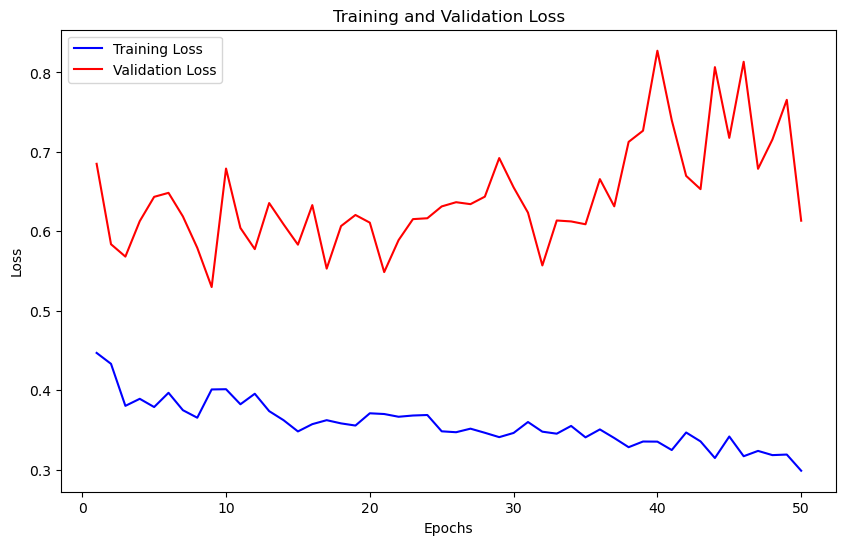

In [138]:
# 손실과 검증 손실 값 가져오기
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


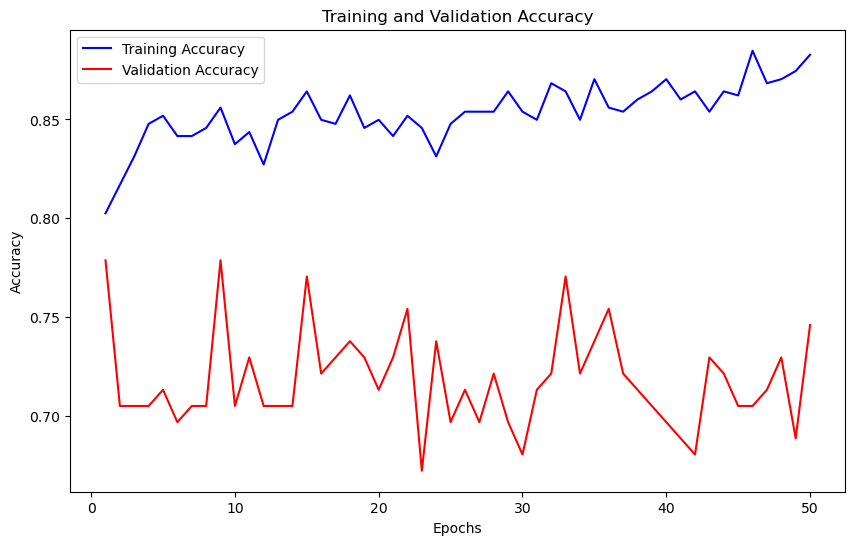

In [139]:
# 정확도와 검증 정확도 값 가져오기
acc = history3.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [140]:
new_model.evaluate(X_test , testy_one_hot)

5/5 [==============================] - 0s 37ms/step - loss: 0.5426 - accuracy: 0.7712


[0.5425625443458557, 0.7712418437004089]

5/5 [==============================] - 0s 19ms/step


2024-09-30 02:15:55.494303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.82      0.92      0.87       124
           1       0.29      0.14      0.19        29

    accuracy                           0.77       153
   macro avg       0.55      0.53      0.53       153
weighted avg       0.72      0.77      0.74       153

[[114  10]
 [ 25   4]]


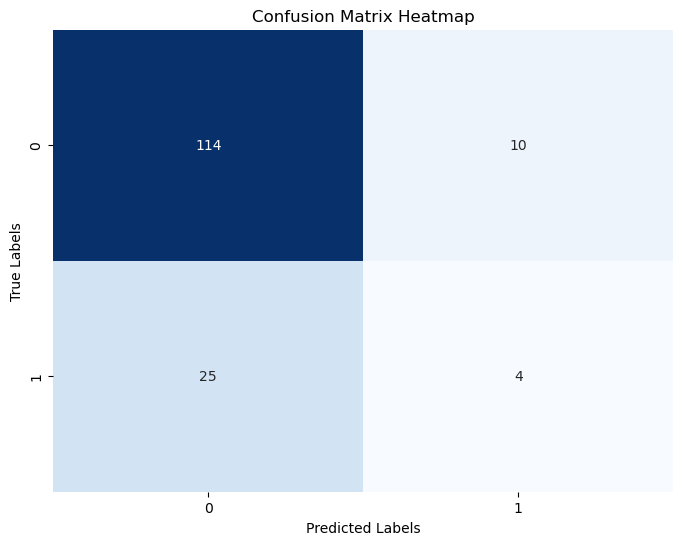

Base Loss: 0.54
Base Accuracy: 77.12%


In [141]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 새로운 모델 평가
base_loss, base_accuracy = new_model.evaluate(X_test, testy_one_hot)

# 예측값 생성
y_pred_class = new_model.predict(X_test)
y_pred_class = y_pred_class.argmax(axis=1)  # 예측값이 원-핫 인코딩이라면 클래스 인덱스로 변환

# y_test_class가 원-핫 인코딩이라면 클래스 인덱스로 변환
y_test_class = testy_one_hot.argmax(axis=1)

# Classification report 출력
print(classification_report(y_test_class, y_pred_class))

# Confusion matrix 생성
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(conf_matrix)

# Confusion matrix heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 모델의 손실과 정확도 출력
print(f'Base Loss: {base_loss:.2f}')
print(f'Base Accuracy: {base_accuracy*100:.2f}%')